In [ ]:
# Information about file

# Student ID : A unique identifier assigned to each student.

# Study Hours Per Day : Average number of hours in which a student spends time for studying daily.

# Extracurricular Hours Per Day : spending time on extra-cocurricular activities such as clubs, arts,sports, or other hobbies.

# Sleep Hours Per Day : Number of hours a student sleeps per day.

# Social Hours Per Day : Time spent with friends, family, or social interactions.

# Physical Activity Hours Per Day : Time spent in physical activities or exercise.

# GPA : Grade Point Average representing academic performance.

# Stress Level : Stress category of the student (Low, Moderate, High).

In [ ]:
# Goal of this is analyze data to find any type of realtionships among the variables and also predict gpa score
# based on predictive features

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sns.set(style='whitegrid')

In [40]:
# Load dataset
df = pd.read_csv("student_lifestyle_dataset.csv")

In [29]:
# View first 5 rows of data
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [41]:
# View contents of the data
df.info()

# Consists of 7 numerical type variables including student_id and 1 character type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [42]:
# Check for missing values
print(df.isnull().sum())  # 0 missing values in data

print()

# Check for any duplicates
print(df.duplicated().sum())    # 0 duplicated values

# Create a copy of dataframe for cleaning and analysis
df_clean = df.copy()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

0


In [9]:
# Check summary statistics for numercal values and round to 2 decimal places
df_clean.describe().round(2)

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1000.50,7.48,1.99,7.50,2.70,4.33,3.12
std,577.49,1.42,1.16,1.46,1.69,2.51,0.30
min,1.00,5.00,0.00,5.00,0.00,0.00,2.24
25%,500.75,6.30,1.00,6.20,1.20,2.40,2.90
50%,1000.50,7.40,2.00,7.50,2.60,4.10,3.11
75%,1500.25,8.70,3.00,8.80,4.10,6.10,3.33
max,2000.00,10.00,4.00,10.00,6.00,13.00,4.00


In [ ]:
# 2000 total students
# Average study hours per day is 7.48, study hours ranges from 5 hours to 10 hours per day
# Average extracurricular hours per day is 1.99, with hours ranging from 0 to 4 hours per day
# Average sleep hours per day is 7.5 with sleeps hours ranging from 5 - 10 hours per day
# Average social hours per day is 2.7 with hours ranging from 0 - 6 hours per day
# Average physical activity hours per day is 4.33 with hours ranging from 0 - 13 hours per day
# Average gpa is 3.12 with gpa's ranging from 2.24 - 4.00

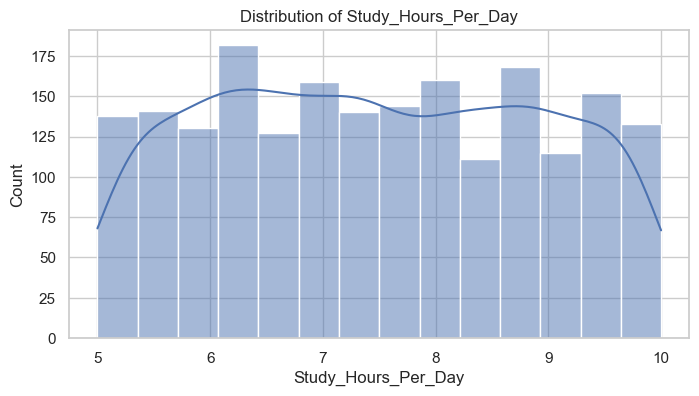

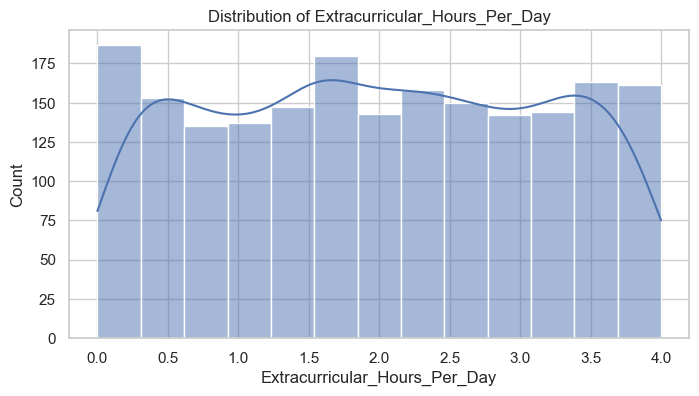

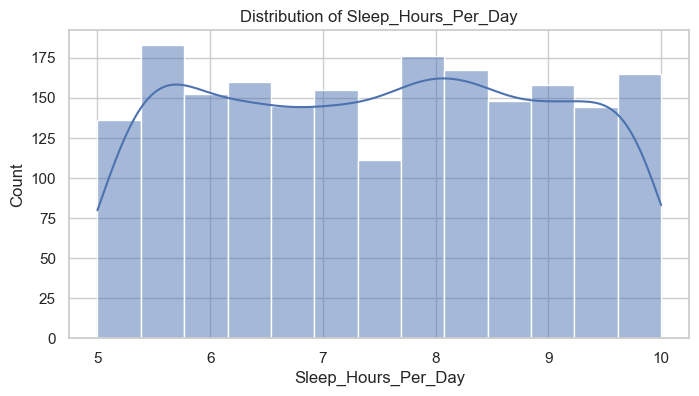

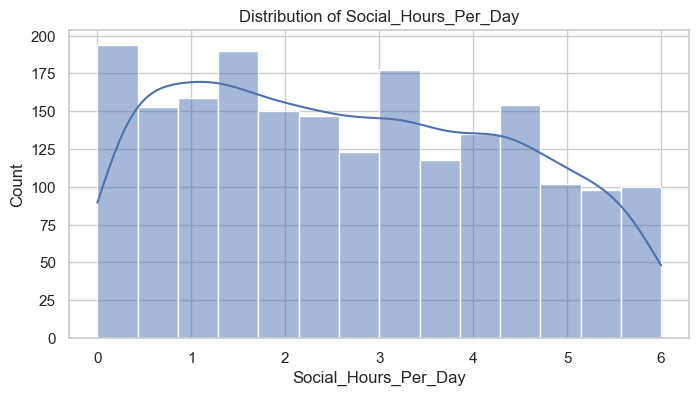

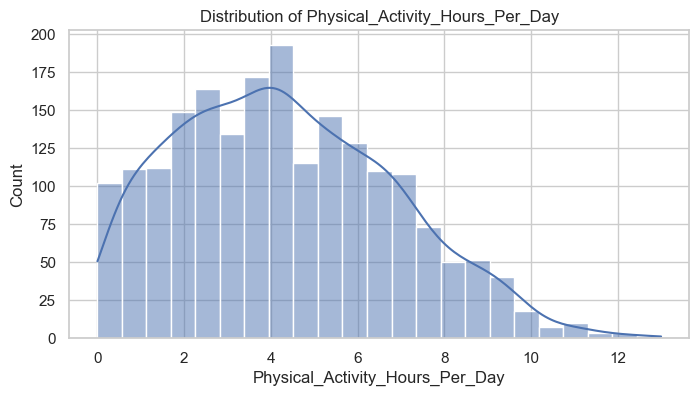

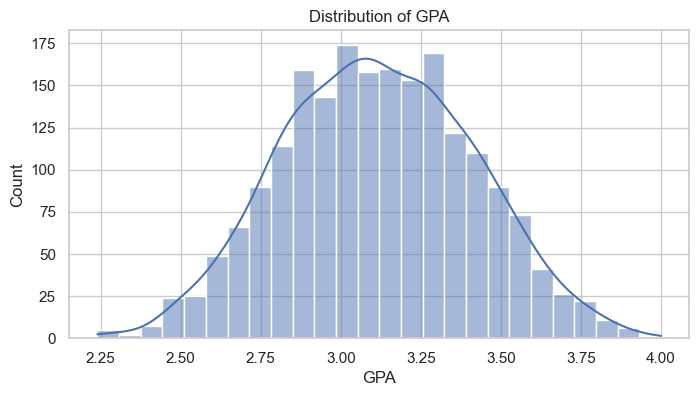

In [10]:
# Perform Univariate Analysis on numeric variables and character variable
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Exclude student id since it is just an identifier
exclude_col = 'Student_ID'
num_cols = num_cols.drop(exclude_col)



for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

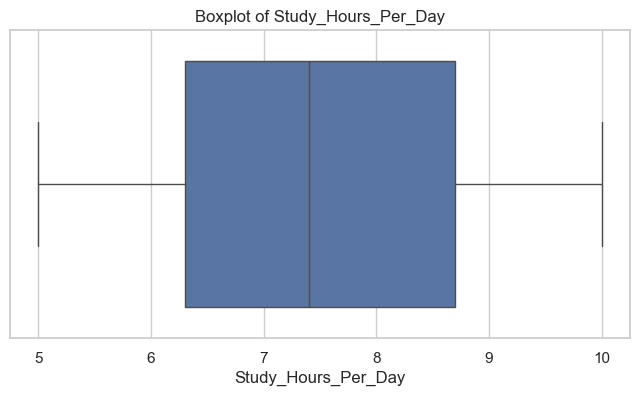

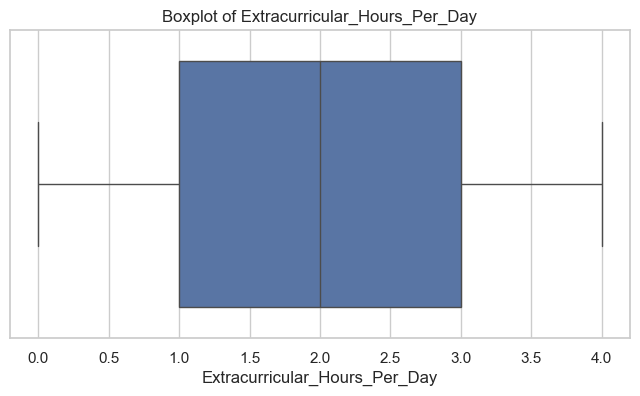

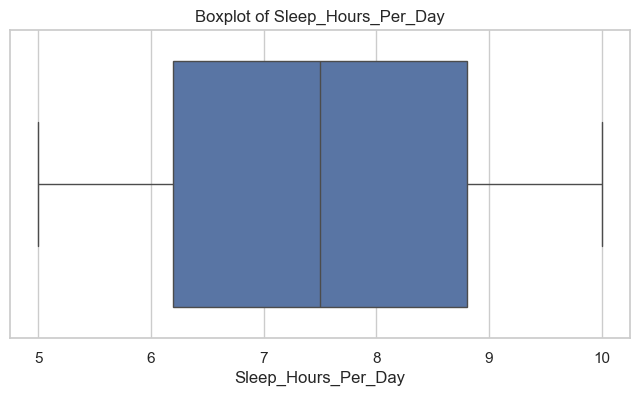

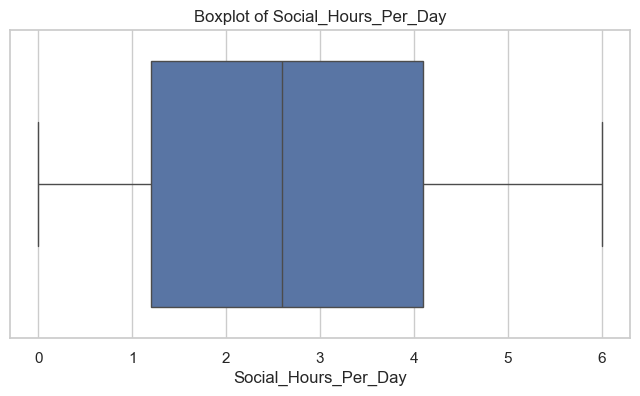

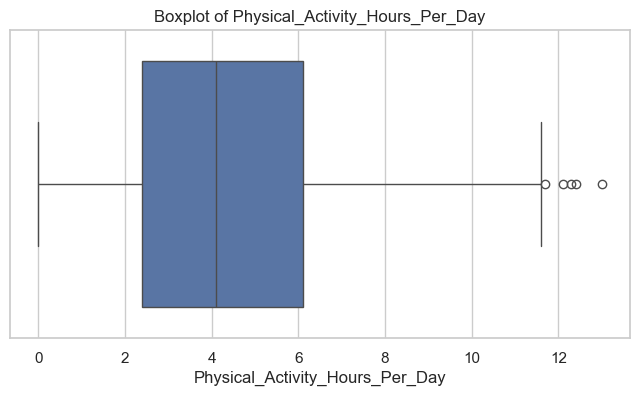

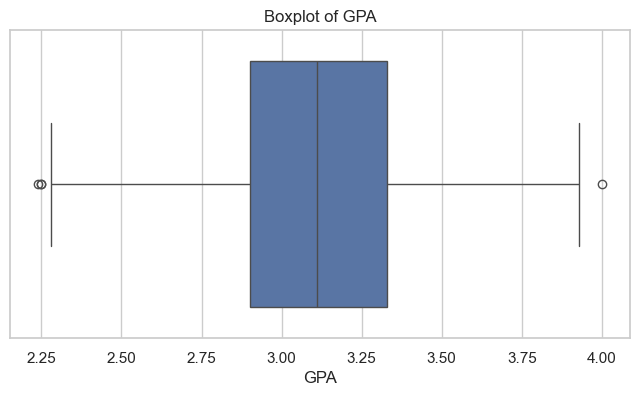

In [11]:
# Create boxplot of numeric values
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_clean[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

C:\Users\shirl\AppData\Local\Temp\ipykernel_7932\459724304.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=col, palette="pastel")


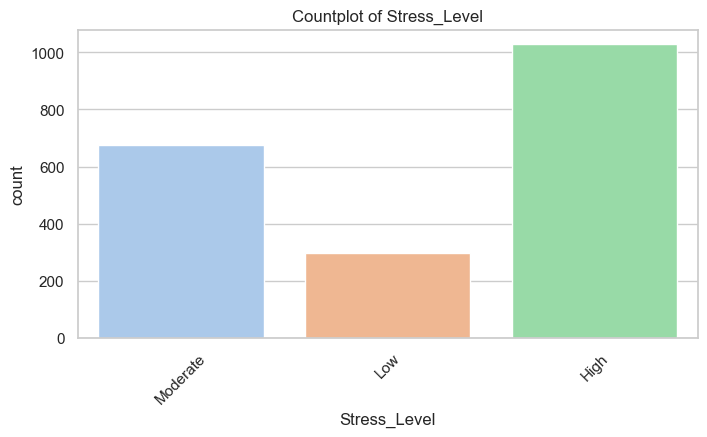

In [12]:
# Get a count plot of stress level
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_clean, x=col, palette="pastel")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

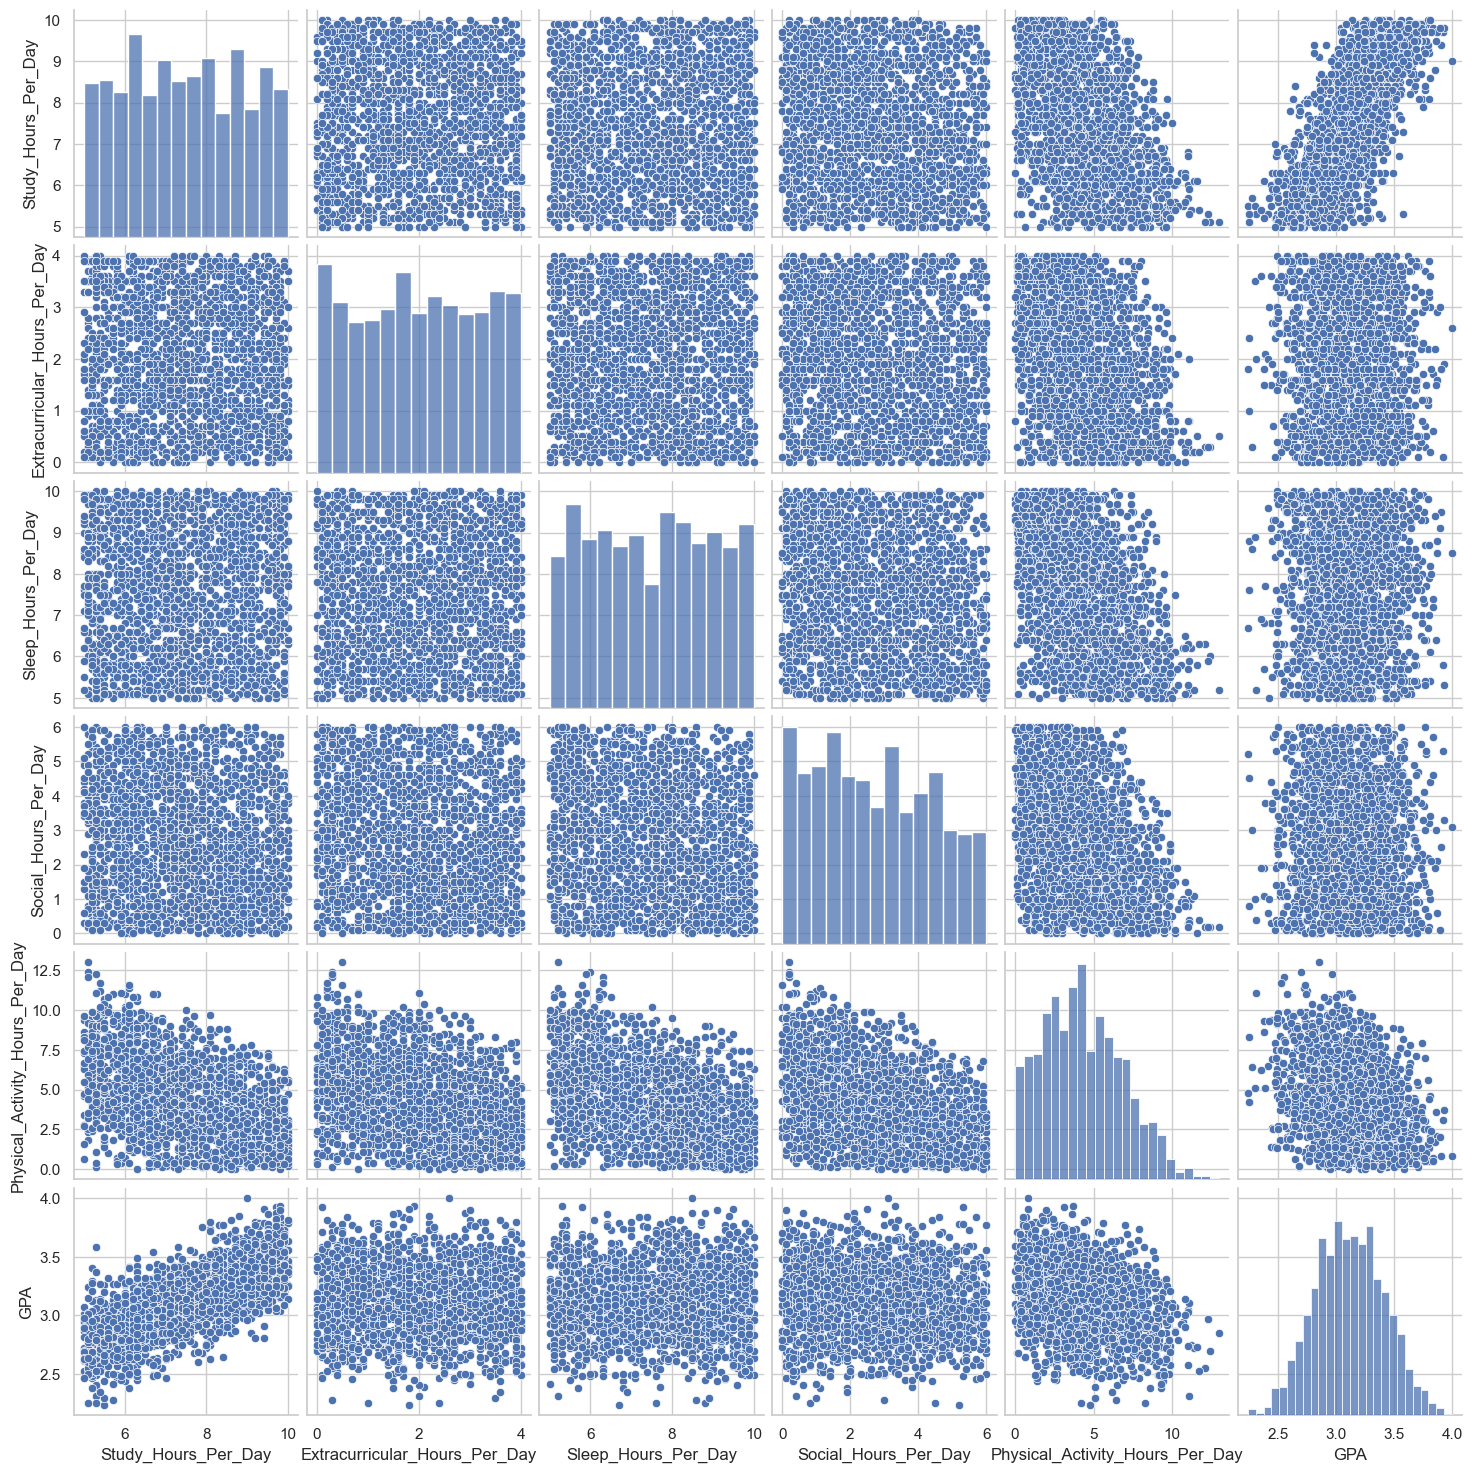

In [14]:
# Let's perform Bivariate Analysis 
# pairplot
sns.pairplot(df_clean[num_cols].dropna())
plt.show()

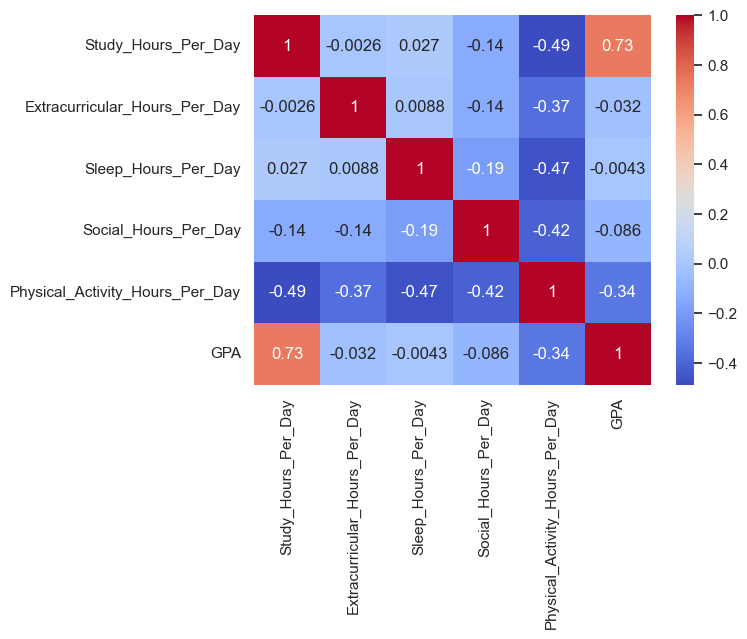

In [15]:
# Let's view heatmap of data
corr = df_clean[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# From heatmap above we see that there is a strong positive correlation between study hours per day and gpa
# Nothing else really have any importance to them correlation wise


C:\Users\shirl\AppData\Local\Temp\ipykernel_7932\3524604937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=col, data=df_clean, palette='deep')


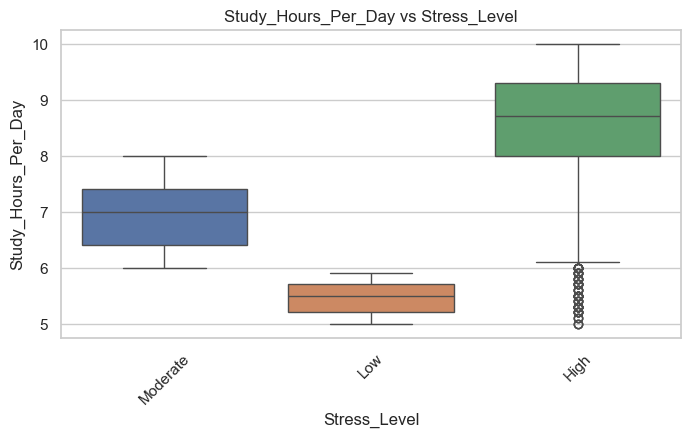

C:\Users\shirl\AppData\Local\Temp\ipykernel_7932\3524604937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=col, data=df_clean, palette='deep')


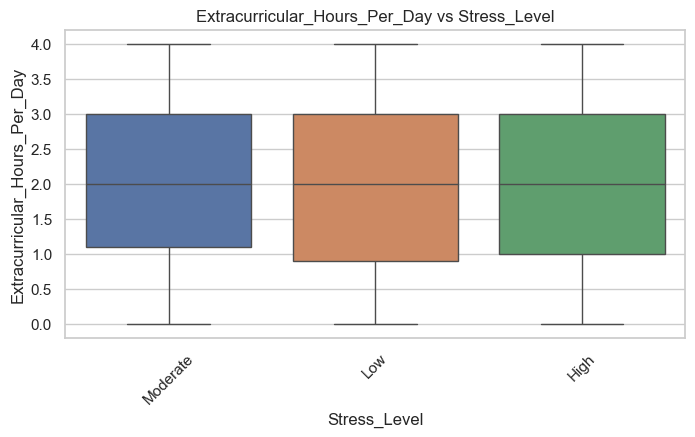

C:\Users\shirl\AppData\Local\Temp\ipykernel_7932\3524604937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=col, data=df_clean, palette='deep')


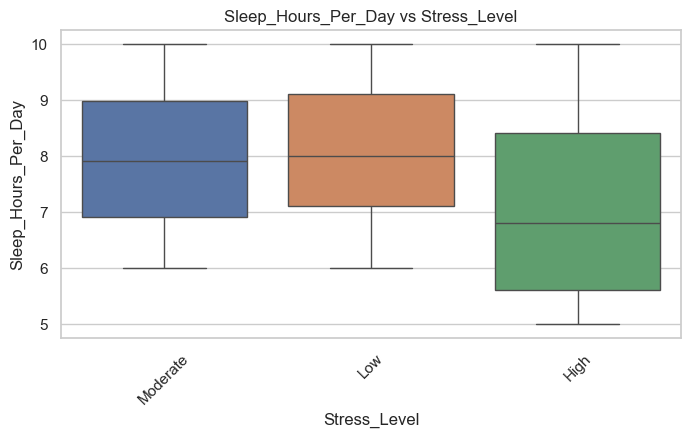

C:\Users\shirl\AppData\Local\Temp\ipykernel_7932\3524604937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=col, data=df_clean, palette='deep')


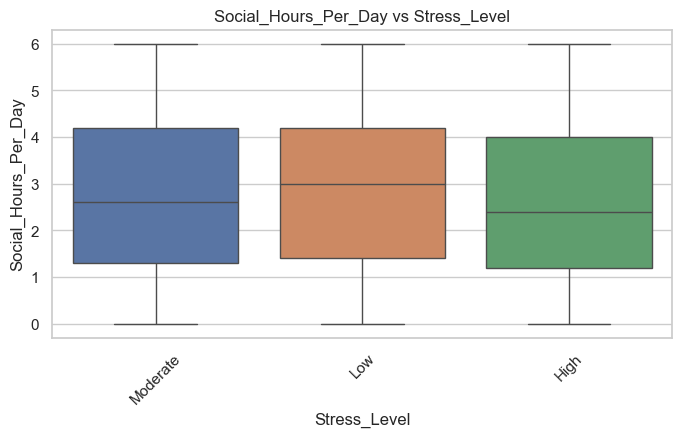

C:\Users\shirl\AppData\Local\Temp\ipykernel_7932\3524604937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=col, data=df_clean, palette='deep')


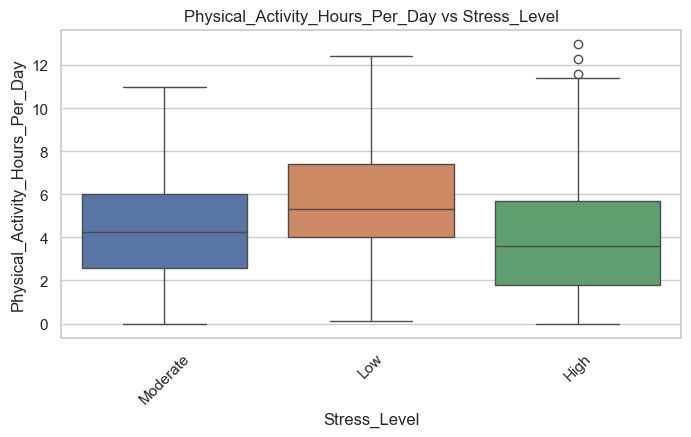

C:\Users\shirl\AppData\Local\Temp\ipykernel_7932\3524604937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=col, data=df_clean, palette='deep')


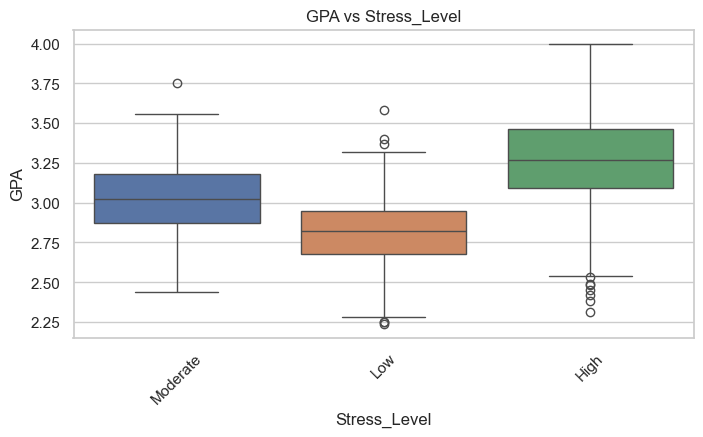

In [18]:
# Let's see how stress level affects different numeric variables
for col in num_cols:
    for cat in cat_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=cat, y=col, data=df_clean, palette='deep')
        plt.title(f"{col} vs {cat}")
        plt.xticks(rotation=45)
        plt.show()

In [43]:
# Drop student Id for Linear Regression Model
df_clean.drop("Student_ID", axis=1, inplace=True)

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              2000 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   GPA                              2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 109.5+ KB


In [46]:
# Perform Linear Regression
np.random.seed(42)

# Select features/predictors and target
X = df_clean.drop('GPA', axis=1)
y = df_clean['GPA']

print("Shape:", X.shape, y.shape)

Shape: (2000, 6) (2000,)


In [47]:
# Apply one hot encoding to Stress Level
X_encoded = pd.get_dummies(X, columns=['Stress_Level'], drop_first=True)

In [49]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [50]:
# Display training samples and test samples
print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 1600, Testing samples: 400


In [51]:
# Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Make Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [53]:
# Create Dataframe for training data with predictions
train_df = X_train.copy()
train_df['Actual GPA'] = y_train
train_df['Predicted_GPA'] = y_pred_train

In [55]:
# Create dataframe for testing data with predictions
test_df = X_test.copy()
test_df['Actual GPA'] = y_test
test_df['Predicted GPA'] = y_pred_test

In [56]:
# View first few rows of Training Data with Predictions
train_df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level_Low,Stress_Level_Moderate,Actual GPA,Predicted_GPA
968,9.7,3.7,7.5,1.0,2.1,False,False,3.04,3.453125
240,6.3,3.2,6.6,2.7,5.2,False,True,2.85,2.906250
819,6.0,0.2,7.8,3.6,6.4,False,True,2.75,2.898438
692,7.8,3.4,9.0,0.7,3.1,False,True,2.95,3.117188
420,8.8,3.2,5.1,5.8,1.1,False,False,3.13,3.335938


In [57]:
# View first few rows of Testing Data with Predictions
test_df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level_Low,Stress_Level_Moderate,Actual GPA,Predicted GPA
1860,6.2,4.0,6.0,3.5,4.3,False,True,2.88,2.890625
353,5.9,2.2,9.9,5.6,0.4,True,False,3.12,2.867188
1333,9.6,2.3,8.3,3.5,0.3,False,False,3.41,3.445312
905,7.2,0.5,7.6,2.1,6.6,False,True,3.11,3.078125
1289,9.0,3.6,9.9,0.3,1.2,False,False,3.19,3.335938


In [58]:
# Evaluate Model Performance
# Training Set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Testing Set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nModel Performance:")
print(f"Training MSE: {mse_train:.2f}, R2: {r2_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}, R2: {r2_test:.2f}")


Model Performance:
Training MSE: 0.04, R2: 0.54
Testing MSE: 0.04, R2: 0.55


In [60]:
# Let's get model coefficients

coef_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': model.coef_
})

print("\nLinear Regression Coefficients:")
print(coef_df)

# Intercept
print("\nIntercept:", model.intercept_)


Linear Regression Coefficients:
                           Feature   Coefficient
0              Study_Hours_Per_Day  2.513076e+12
1    Extracurricular_Hours_Per_Day  2.513076e+12
2              Sleep_Hours_Per_Day  2.513076e+12
3             Social_Hours_Per_Day  2.513076e+12
4  Physical_Activity_Hours_Per_Day  2.513076e+12
5                 Stress_Level_Low  5.966187e-03
6            Stress_Level_Moderate -2.323914e-02

Intercept: -60313815330674.66


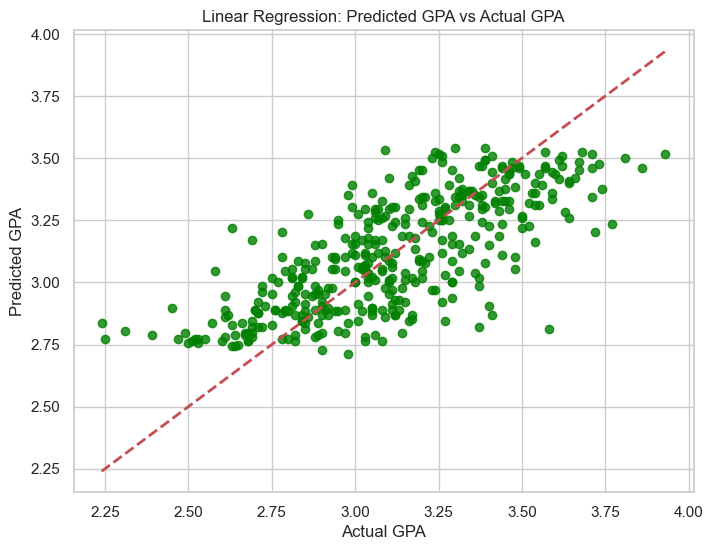

In [65]:
# Visualize predictions vs actual (Test Set)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_test, alpha=0.8, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Linear Regression: Predicted GPA vs Actual GPA')
plt.grid(True)
plt.show()

In [76]:
# we can use statsmodel to get a more in detail analysis of the linear regression model
import statsmodels.formula.api as smf



# Define formula
formula = """
GPA ~
C(Stress_Level) +
Study_Hours_Per_Day + 
Extracurricular_Hours_Per_Day  +
Sleep_Hours_Per_Day +
Social_Hours_Per_Day  +
Physical_Activity_Hours_Per_Day 
"""

# Define OLS Model
mod = smf.ols(formula=formula, data=df_clean).fit()

# Print model summary
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     392.7
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        23:27:18   Log-Likelihood:                 359.77
No. Observations:                2000   AIC:                            -705.5
Df Residuals:                    1993   BIC:                            -666.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
# Coefficients are different since we used the whole dataframe for statsmodels and test/train sets for sklearn
# F-Statistic is large (392.7) this implies that model is statistically significant
# p-value is 0.00 and since it is less than 0.05 we would reject the null and
# conclude that the model provides a better fit to the data than a model with no predictors.